# Logistic Regression - Code

In diesem Notebook schauen wir uns die `Logistic Regression` an.

## Setup

Setup Code muss *nicht* verstanden werden.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np


In [26]:
from sklearn.preprocessing import OrdinalEncoder
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02, same_aspect=False):

    palette = dict(zip(
        ['Other', 'Setosa'],
        sns.color_palette()
    ))

    oe = OrdinalEncoder(categories=[['Other', 'Setosa']]).fit(y.values.reshape(-1, 1))

    # y_enc = oe.transform(y.values.reshape(-1, 1))

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    x2_min, x2_max = X[:, 1].min() - 3, X[:, 1].max() + 3
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = oe.transform(Z.reshape(-1, 1))
    Z = Z.reshape(xx1.shape)

    plt.autoscale(True)
    ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=palette)

    plt.autoscale(False)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(palette.values()))

    if same_aspect:
        plt.gca().set_aspect('equal', adjustable='box')

    _ = ax.set_xlabel('petal length (cm)')
    _ = ax.set_ylabel('petal width (cm)')
    return ax

In [27]:
# sepal length,sepal width,petal length,petal width,name
df = pd.read_csv('data/iris.csv')[['sepal length', 'sepal width', 'petal length', 'petal width', 'name']].rename(columns={
    'sepal length': 'sepal length (cm)',
    'sepal width': 'sepal width (cm)',
    'petal length': 'petal length (cm)',
    'petal width': 'petal width (cm)',
})

numeric_cols = [
    'sepal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'petal width (cm)'
]
df[numeric_cols] = StandardScaler().fit_transform(df[numeric_cols])

df['setosa'] = df['name'].apply(lambda name: 'Setosa' if name == 'Setosa' else 'Other')
df['versicolor'] = df['name'].apply(lambda name: 'Versicolor' if name == 'Versicolor' else 'Other')
df['virginica'] = df['name'].apply(lambda name: 'Virginica' if name == 'Virginica' else 'Other')

display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,setosa,versicolor,virginica
0,-0.900681,1.032057,-1.341272,-1.312977,Setosa,Setosa,Other,Other
1,-1.143017,-0.124958,-1.341272,-1.312977,Setosa,Setosa,Other,Other
2,-1.385353,0.337848,-1.398138,-1.312977,Setosa,Setosa,Other,Other
3,-1.506521,0.106445,-1.284407,-1.312977,Setosa,Setosa,Other,Other
4,-1.021849,1.263460,-1.341272,-1.312977,Setosa,Setosa,Other,Other
...,...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,Virginica,Other,Other,Virginica
146,0.553333,-1.281972,0.705893,0.922064,Virginica,Other,Other,Virginica
147,0.795669,-0.124958,0.819624,1.053537,Virginica,Other,Other,Virginica
148,0.432165,0.800654,0.933356,1.447956,Virginica,Other,Other,Virginica


## Teil 1

TODO

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)', 'petal width (cm)']], df['setosa'], test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [29]:
model = Pipeline([
    ('std', StandardScaler()),
    ('clf', LogisticRegression())
])
model.fit(X_train, y_train)

Pipeline(steps=[('std', StandardScaler()), ('clf', LogisticRegression())])

/Users/beni/IdeaProjects/cas-machine-learning-slides/code-examples/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

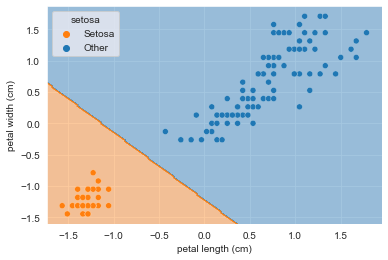

In [30]:
plot_decision_regions(
    df[['petal length (cm)', 'petal width (cm)']].values,
    df['setosa'],
    model
)

## Teil 2

In [31]:
from sklearn.metrics import accuracy_score

y_train_hat = model.predict(X_train)
accuracy_score_train = accuracy_score(y_train, y_train_hat)
print("Train Set:", f"{accuracy_score_train*100}%")

y_test_hat = model.predict(X_test)
accuracy_score_test = accuracy_score(y_test, y_test_hat)
print("Test Set:", f"{accuracy_score_test*100}%")

Train Set: 100.0%
Test Set: 100.0%


In [32]:
clf = model['clf']
beta_0 = clf.intercept_[0]
beta_1 = clf.coef_[0][0]
beta_2 = clf.coef_[0][1]
print("Gelernte Betas:", f"beta_0={beta_0}, beta_1={beta_1}, beta_2={beta_2}", sep="\n")

Gelernte Betas:
beta_0=-2.5671055098951583, beta_1=-2.3481989955257663, beta_2=-2.16243902913795


Und wir können die gelernten $\vec{\beta}$ auch noch visualisieren.